In [23]:
%matplotlib notebook
import random as rn
import matplotlib
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])


lowestBust = 31.235
highestProfitrate = 63.208

def RollDice():
    roll = rn.randint(1,100)
    if roll == 100:
        #print(roll, ":100, You lose")
        return False
    elif roll <= 50:
        #print(roll,": 1-50, You lose")
        return False
    else:
        #print(roll,": 51-99, You win")
        return True
    
def SimpleBettor(funds,intial_wager,wager_count):
    value = funds
    wager = intial_wager
    
    wX = []
    vY = []
    broke = []
    current_wager=1
    
    while current_wager <= wager_count:
        if value <=0:
            broke = current_wager
        else:
            if RollDice():
                value += wager
                wX.append(current_wager)
                vY.append(value)
            else:
                value -= wager
                wX.append(current_wager)
                vY.append(value)
        current_wager += 1

    #print("Funds:",value)
    plt.plot(wX,vY,"r")
    if value > funds:
        profit = True
    else:
        profit = False
    
    return broke, value, profit

def doubler(funds,intial_wager,wager_count):
    value = funds
    wager = intial_wager
    
    wX = []
    vY = []
    
    current_wager =1
    previousWager = "win"
    previousWagerAmount = intial_wager
    
    brokeafter = []
    
    while current_wager <= wager_count:
        if previousWager=="win":
            if RollDice():
                value+=wager
                wX.append(current_wager)
                vY.append(value)
            else:
                value -= wager
                previousWager = "loss"
                previousWagerAmount = wager
                wX.append(current_wager)
                vY.append(value)
                if value <= 0:
                    brokeafter = current_wager
                    break
        elif previousWager == "loss":
            wager = 2*previousWagerAmount
            if RollDice():
                if (value-wager)<0:
                    wager = value
                value += wager
                wager=intial_wager
                previousWager="win"
                wX.append(current_wager)
                vY.append(value)
            else:
                if (value-wager)<0:
                    wager = value
                value -= wager                  
                previousWager="loss"
                previousWagerAmount=wager
                wX.append(current_wager)
                vY.append(value)
            if value <= 0:
                brokeafter=current_wager
                break
                
        current_wager += 1
    if value > funds:
        profit = True
    else:
        profit = False
    plt.plot(wX,vY,"c")
    return brokeafter, value, profit 

def randomMultiple(funds, initial_wager, wager_count):
    
          

<IPython.core.display.Javascript object>


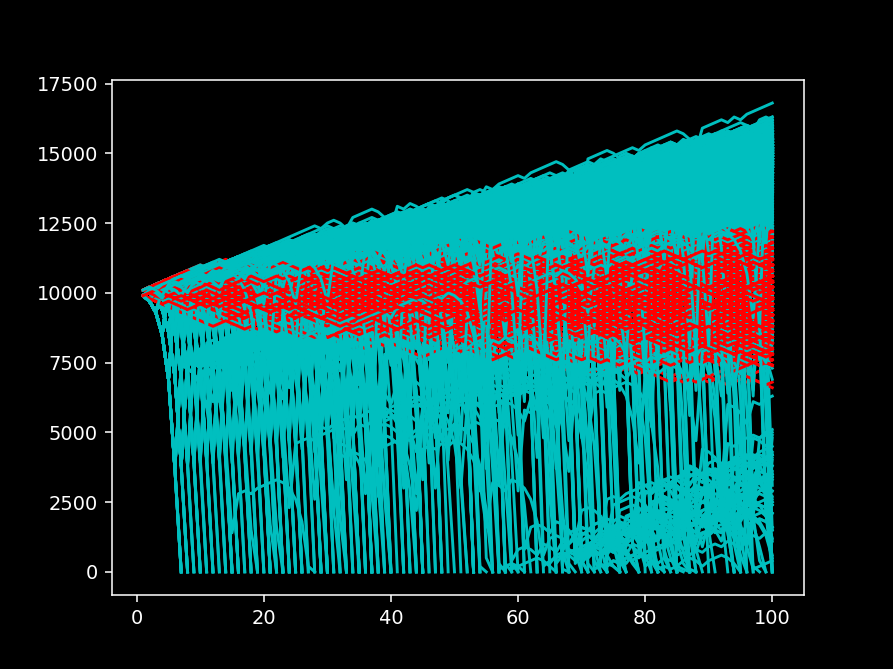

Simple Bettor profit chance: 37.4
Simple Bettor broke chance: 0.0
Doubler profit chance: 63.1
Doubler broke chance: 31.1


In [22]:

x=0
simpleBrokeafter = []
doublerBrokeafter = []
doublerprofit = 0.00
simpleprofit = 0.00

startFunds = 10000
startWager = 100
rounds = 100

samplesize = 1000.00
while x<samplesize:
    a = SimpleBettor(startFunds,startWager,rounds)
    b = doubler(startFunds,startWager,rounds)
    simpleBrokeafter.append(a[0])
    doublerBrokeafter.append(b[0])
    x+=1
    if a[2] == True:
        simpleprofit +=1
    if b[2] == True:
        doublerprofit +=1
    
simpleBrokeafter = sorted(list(filter(None,simpleBrokeafter)))
doublerBrokeafter = sorted(list(filter(None,doublerBrokeafter)))

print("Simple Bettor profit chance:",(simpleprofit/samplesize)*100.00)
print("Simple Bettor broke chance:",(len(simpleBrokeafter)/samplesize)*100.00)

print("Doubler profit chance:",(doublerprofit/samplesize)*100.00)
print("Doubler broke chance:",(len(doublerBrokeafter)/samplesize)*100.00)
